# How to download ChEMBL dataset

「ChEMBL download」などと検索すると出てくる[このページ](https://chembl.gitbook.io/chembl-interface-documentation/downloads)を開いて"ChEMBLdb"をクリック

chembl_{数字}.sdf.gzをダウンロード

クリックでそのままダウンロードしても良いし、wgetでダウンロードするのもOK. 
ただしダウンロードするのに1時間弱くらい時間がかかる
```cmd
wget https://ftp.ebi.ac.uk/pub/databases/chembl/ChEMBLdb/latest/chembl_33.sdf.gz
```

In [3]:
import gzip
from rdkit import Chem
# sdf.gzファイルのまま読み込む場合は以下をコメントアウト
#sdf_gz = gzip.open("./chembl_33.sdf.gz")
#sup = Chem.ForwardSDMolSupplier(sdf_gz)
#mols = [mol for mol in sup if mol is not None]
#mols

以下のコマンドで元ファイルを残したままファイルを解凍することができる
```cmd
gunzip -k chembl_33.sdf.gz
```

# How to download zinc dataset

多くの化合物を選択するとダウンロードに時間がかかる（場合によってはできない）ので、subsetを適当に選択する。

例1)世界で承認されている(多分)化合物のデータセット
https://zinc15.docking.org/substances/subsets/world/

例2)今すぐ買うことができる化合物のデータセット
https://zinc15.docking.org/substances/subsets/now/

左上の方に下矢印のボタンが出てくるので、そこを押すと好きなフォーマットでダウンロードすることができる。

以上のリンクの最後に好きなフォーマットをつけてwgetでダウンロードすることも可能

```cmd
wget https://zinc15.docking.org/substances/subsets/now.sdf
```

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw

suppl = Chem.SDMolSupplier("./data/now.sdf")
mols = [x for x in suppl if x is not None] #./now.sdfに含まれる分子をmolオブジェクトにしたもののリスト

print(len(mols))

100


In [5]:
# get property name

for prop in mols[0].GetPropNames():
     print('{}: {}'.format(prop, mols[0].GetProp(prop)))

zinc_id: ZINC000953998451
smiles: COc1cc2cc(c1Cl)N(C)C(=O)C[C@H](OC(=O)[C@H](C)N(C)C(=O)CCC(C)(C)S)[C@]1(C)O[C@H]1[C@H](C)[C@@H]1C[C@@](O)(NC(=O)O1)[C@H](OC)C=CC=C(C)C2


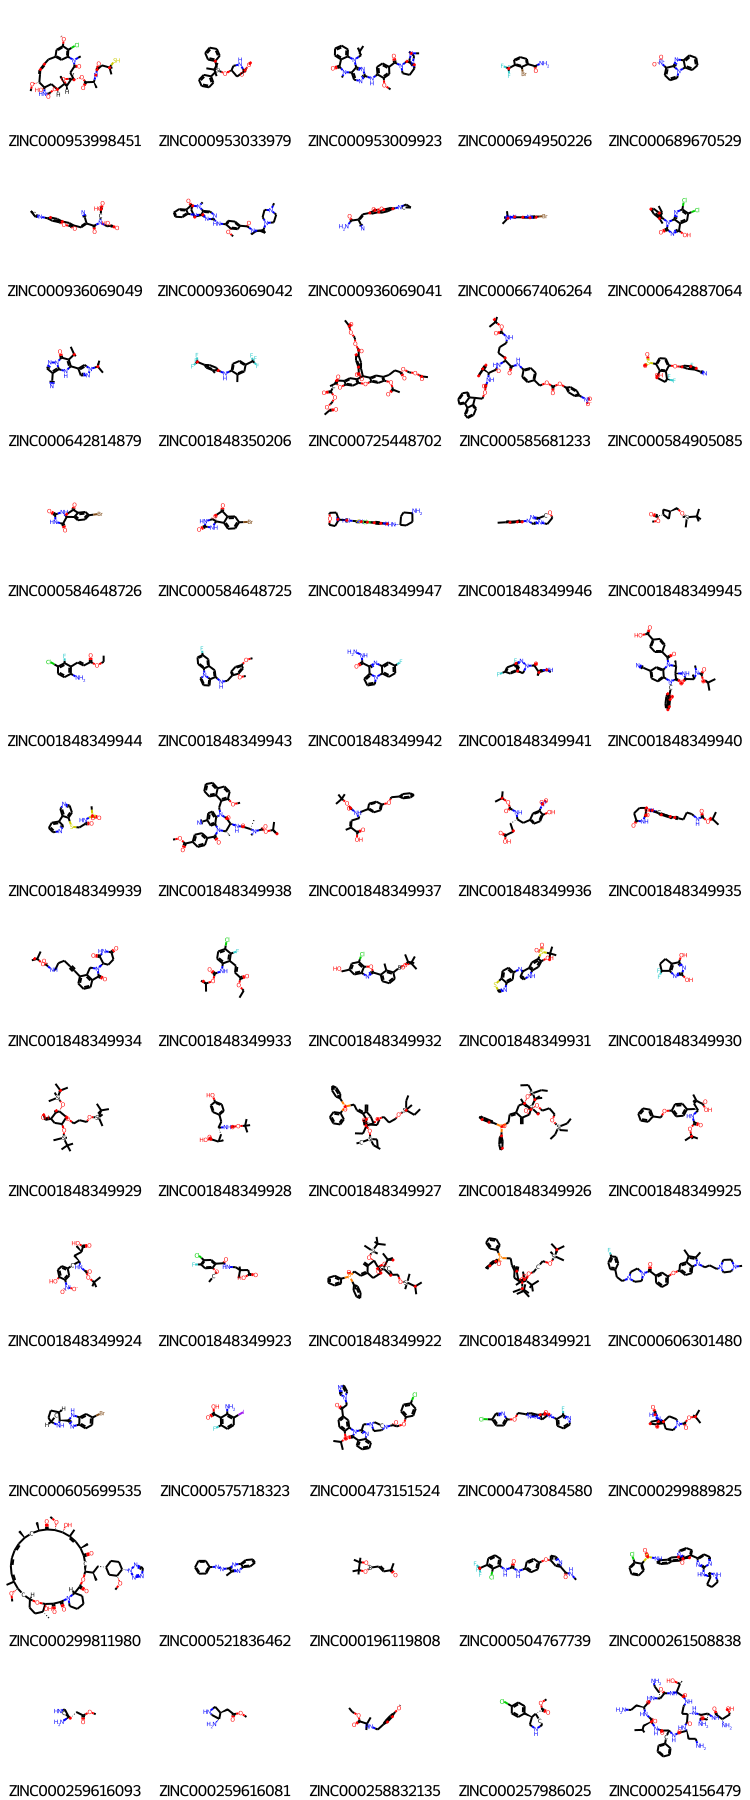

In [6]:
Draw.MolsToGridImage(mols[:60], molsPerRow = 5, subImgSize = (150,150),
                     legends = [mol.GetProp("zinc_id") for mol in mols], maxMols = 60)
#molsのうち最初の60分子を描画した。
#1行あたりに表示する分子数をmolsPerRowで指定した(今回は5個とした)
#画像の大きさをsubImgSizeで指定した(今回は150×150とした)
#分子のラベルをlegendsで指定した(今回はzinc_idのリストを取得して指定した)
#表示する最大分子数をmaxMolsで指定した(今回は60分子とした)

In [9]:
# pandastoolを用いた解析手法
import pandas as pd
from rdkit.Chem import PandasTools

df = PandasTools.LoadSDF('./data/now.sdf')
df.head

<bound method NDFrame.head of              zinc_id                                             smiles ID  \
0   ZINC000953998451  COc1cc2cc(c1Cl)N(C)C(=O)C[C@H](OC(=O)[C@H](C)N...      
1   ZINC000953033979  COC(=O)[C@@H]1C[C@@H](O[Si](c2ccccc2)(c2ccccc2...      
2   ZINC000953009923  CC[C@@H](C)N1c2ccccc2C(=O)N(C)c2cnc(Nc3ccc(C(=...      
3   ZINC000694950226                         NC(=O)c1cccc(C(F)(F)F)c1Br      
4   ZINC000689670529                    O=[N+]([O-])c1cccn2c1nc1ccccc12      
..               ...                                                ... ..   
95  ZINC000147832037                               COc1cc(C)nc(OC)c1C#N      
96  ZINC000224309252  Nc1ccc(C(=O)Nc2cccc(Nc3ncc(Cl)c(-c4cn(S(=O)(=O...      
97  ZINC000224188557  CC(C)(C)P1c2c(cccc2-c2c3ccccc3cc3ccccc23)O[C@H...      
98  ZINC000147540753                         CCOC(=O)N(CC(=O)O)Cc1ccco1      
99  ZINC000147242206  O=C1OC2(c3ccc(OS(=O)(=O)C(F)(F)F)cc3Oc3cc(OS(=...      

                                 

In [10]:
df[['zinc_id','smiles']].to_csv('./data/now_sdf.csv',encoding='utf-8')